In [19]:
#importar librerias

import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

from google.colab import drive;

#monbtamos el drive

drive.mount('gdrive')
ruta = '/content/gdrive/MyDrive/Analítica de Datos/AGRESIONES_POR_ANIMALES_TRANSMISORES_DE_RABIA_20251201.csv'
data = pd.read_csv(ruta)

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [20]:
print(data.dtypes)
print(data.shape)
print("\nValores faltantes por columna:\n", data.isnull().sum())
data.head()

CODIGO EVENTO                  int64
SEMANA                         int64
AÑO                           object
SEXO                          object
AREA                          object
TIPO SEGURIDAD SOCIAL         object
NOMBRE DEL EVENTO             object
DEPARTAMENTO DE OCURRENCIA    object
MUNICIPIO DE OCURRENCIA       object
PAIS DE RESIDENCIA            object
DEPARTAMENTO DE RESIDENCIA    object
NACIONALIDAD                  object
PERTENENCIA ETNICA            object
EDAD                           int64
UNI_MED                       object
dtype: object
(5926, 15)

Valores faltantes por columna:
 CODIGO EVENTO                 0
SEMANA                        0
AÑO                           0
SEXO                          0
AREA                          0
TIPO SEGURIDAD SOCIAL         0
NOMBRE DEL EVENTO             0
DEPARTAMENTO DE OCURRENCIA    0
MUNICIPIO DE OCURRENCIA       0
PAIS DE RESIDENCIA            0
DEPARTAMENTO DE RESIDENCIA    0
NACIONALIDAD                  0
PER

,CODIGO EVENTO,SEMANA,AÑO,SEXO,AREA,TIPO SEGURIDAD SOCIAL,NOMBRE DEL EVENTO,DEPARTAMENTO DE OCURRENCIA,MUNICIPIO DE OCURRENCIA,PAIS DE RESIDENCIA,DEPARTAMENTO DE RESIDENCIA,NACIONALIDAD,PERTENENCIA ETNICA,EDAD,UNI_MED
0,300,44,"2,022",F,CENTRO POBLADO,SUBSIDIADO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...,RISARALDA,PEREIRA,COLOMBIA,RISARALDA,COLOMBIA,"NEGRO, MULATO AFRO COLOMBIANO",60,AÑOS
1,300,52,"2,022",F,CENTRO POBLADO,CONTRIBUTIVO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...,RISARALDA,PEREIRA,COLOMBIA,RISARALDA,COLOMBIA,OTRO,24,AÑOS
2,300,52,"2,022",F,CABECERA MUNICIPAL,EXCEPCIÓN,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...,RISARALDA,PEREIRA,COLOMBIA,RISARALDA,COLOMBIA,OTRO,64,AÑOS
3,300,52,"2,022",M,CENTRO POBLADO,CONTRIBUTIVO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...,RISARALDA,PEREIRA,COLOMBIA,RISARALDA,COLOMBIA,OTRO,28,AÑOS
4,300,52,"2,022",M,CABECERA MUNICIPAL,CONTRIBUTIVO,AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMI...,RISARALDA,PEREIRA,COLOMBIA,RISARALDA,COLOMBIA,OTRO,82,AÑOS


In [21]:
# Limpiar y convertir la columna 'AÑO' a tipo entero, eliminando comas y puntos
data['AÑO'] = data['AÑO'].str.replace(',', '').str.replace('.', '', regex=False).astype(int)

# Verificar los tipos de datos después de la transformación
print(data.dtypes)

# Verificar los valores únicos de 'UNI_MED'
print("\nValores únicos de UNI_MED:\n", data['UNI_MED'].unique())

CODIGO EVENTO                  int64
SEMANA                         int64
AÑO                            int64
SEXO                          object
AREA                          object
TIPO SEGURIDAD SOCIAL         object
NOMBRE DEL EVENTO             object
DEPARTAMENTO DE OCURRENCIA    object
MUNICIPIO DE OCURRENCIA       object
PAIS DE RESIDENCIA            object
DEPARTAMENTO DE RESIDENCIA    object
NACIONALIDAD                  object
PERTENENCIA ETNICA            object
EDAD                           int64
UNI_MED                       object
dtype: object

Valores únicos de UNI_MED:
 ['AÑOS' 'DIAS' 'MESES']


### Distribución de la Edad

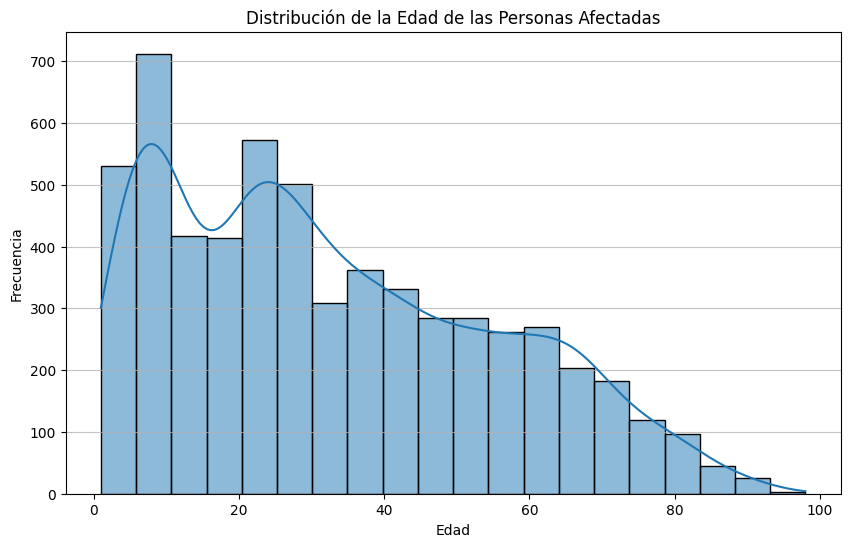

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['EDAD'], bins=20, kde=True)
plt.title('Distribución de la Edad de las Personas Afectadas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Distribución por Sexo

/tmp/ipython-input-2784490394.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SEXO', data=data, palette='viridis')


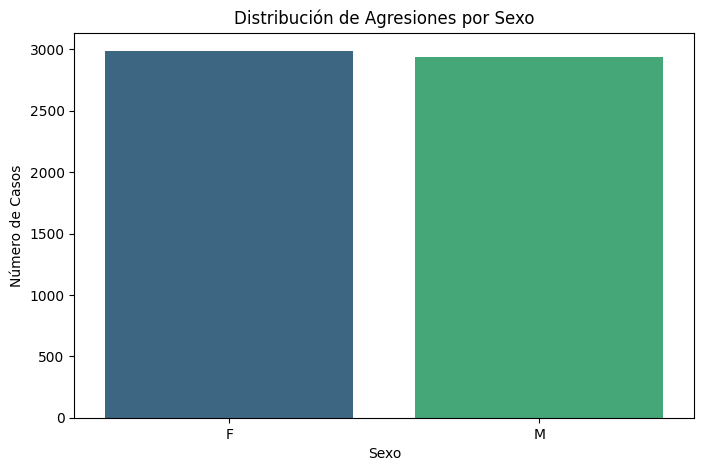

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='SEXO', data=data, palette='viridis')
plt.title('Distribución de Agresiones por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Casos')
plt.show()

### Distribución por Área de Ocurrencia

/tmp/ipython-input-4021262683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AREA', data=data, palette='magma', order=data['AREA'].value_counts().index)


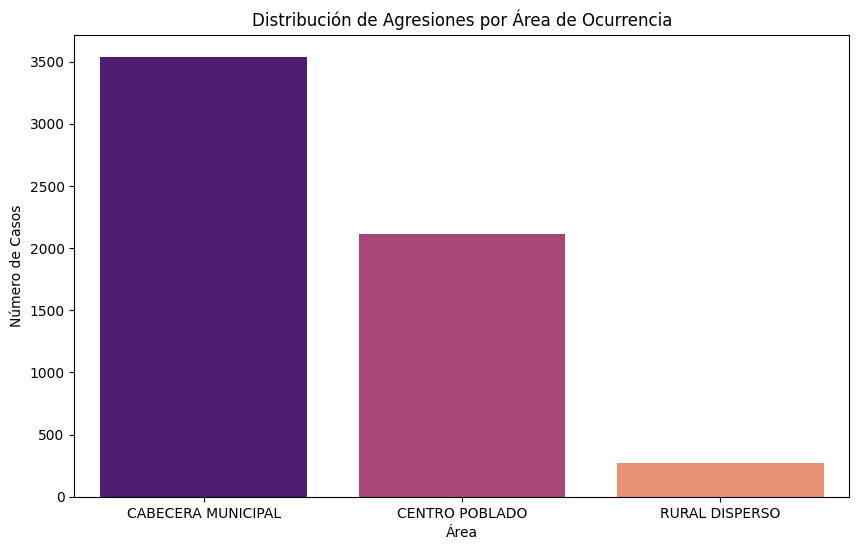

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AREA', data=data, palette='magma', order=data['AREA'].value_counts().index)
plt.title('Distribución de Agresiones por Área de Ocurrencia')
plt.xlabel('Área')
plt.ylabel('Número de Casos')
plt.show()

### Distribución de la Edad por Sexo

/tmp/ipython-input-365975706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SEXO', y='EDAD', data=data, palette='coolwarm')


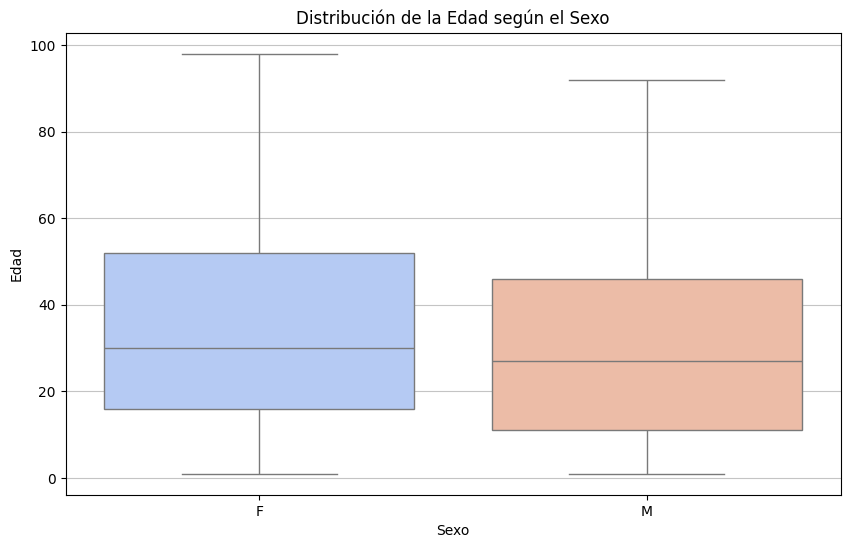

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEXO', y='EDAD', data=data, palette='coolwarm')
plt.title('Distribución de la Edad según el Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Distribución de la Edad por Área de Ocurrencia

/tmp/ipython-input-1934430440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AREA', y='EDAD', data=data, palette='flare')


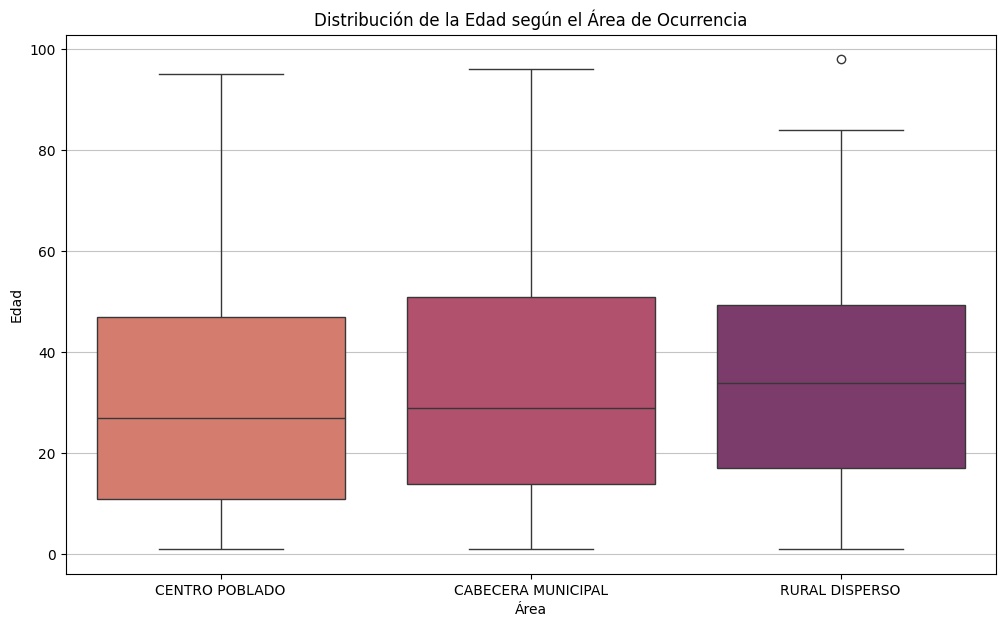

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='AREA', y='EDAD', data=data, palette='flare')
plt.title('Distribución de la Edad según el Área de Ocurrencia')
plt.xlabel('Área')
plt.ylabel('Edad')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [27]:
# Estadísticas descriptivas para columnas numéricas
display(data.describe())

,CODIGO EVENTO,SEMANA,AÑO,EDAD
count,5926.0,5926.000000,5926.000000,5926.000000
mean,300.0,26.650523,2023.018562,32.795646
std,0.0,14.925204,0.807137,22.432351
min,300.0,1.000000,2022.000000,1.000000
25%,300.0,14.000000,2022.000000,13.000000
50%,300.0,27.000000,2023.000000,29.000000
75%,300.0,39.000000,2024.000000,50.000000
max,300.0,52.000000,2024.000000,98.000000


Ahora, vamos a ver la distribución de algunas variables categóricas, como 'SEXO', 'AREA' y 'UNI_MED' para entender mejor su composición.

In [28]:
print("\nDistribución de la variable 'SEXO':\n", data['SEXO'].value_counts())
print("\nDistribución de la variable 'AREA':\n", data['AREA'].value_counts())
print("\nDistribución de la variable 'UNI_MED':\n", data['UNI_MED'].value_counts())


Distribución de la variable 'SEXO':
 SEXO
F    2987
M    2939
Name: count, dtype: int64

Distribución de la variable 'AREA':
 AREA
CABECERA MUNICIPAL    3539
CENTRO POBLADO        2115
RURAL DISPERSO         272
Name: count, dtype: int64

Distribución de la variable 'UNI_MED':
 UNI_MED
AÑOS     5907
MESES      17
DIAS        2
Name: count, dtype: int64
